In [183]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix
from sklearn import base
from scipy.stats import norm
import random as rnd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import time
from tqdm import tqdm
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
df_invehicle = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")
df_invehicle.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df_invehicle.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
df_invehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df=df_invehicle

Most variables are categorical

In [6]:
for col in df:
  print(df[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Trans

In [7]:
df['AM/PM'] = df.time.str.extract('([a-zA-Z]+)', expand=True)
df['Time'] = df.time.str.extract('([^a-zA-Z]+)', expand=True)
df['Time'] = pd.to_numeric(df['Time'])

In [8]:
# Converting to a 24 hour Time Format:
for j in range(len(df['AM/PM'])):
  if df['AM/PM'].iloc[j] == "PM":
    df['time'].iloc[j] = df['Time'].iloc[j]+12 
  else:
    df['time'].iloc[j] = df['Time'].iloc[j]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df=df.drop(columns=['car','AM/PM','Time',])
df=df.dropna()

In [10]:
df.iloc[:,(df.dtypes=="int64").values].nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

Since 'toCoupon_GEQ5min' has the value '1' throughout, it does not add any value to our dataset and hence we proceed with dropping that column.

In [11]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)


Univariate Analysis:

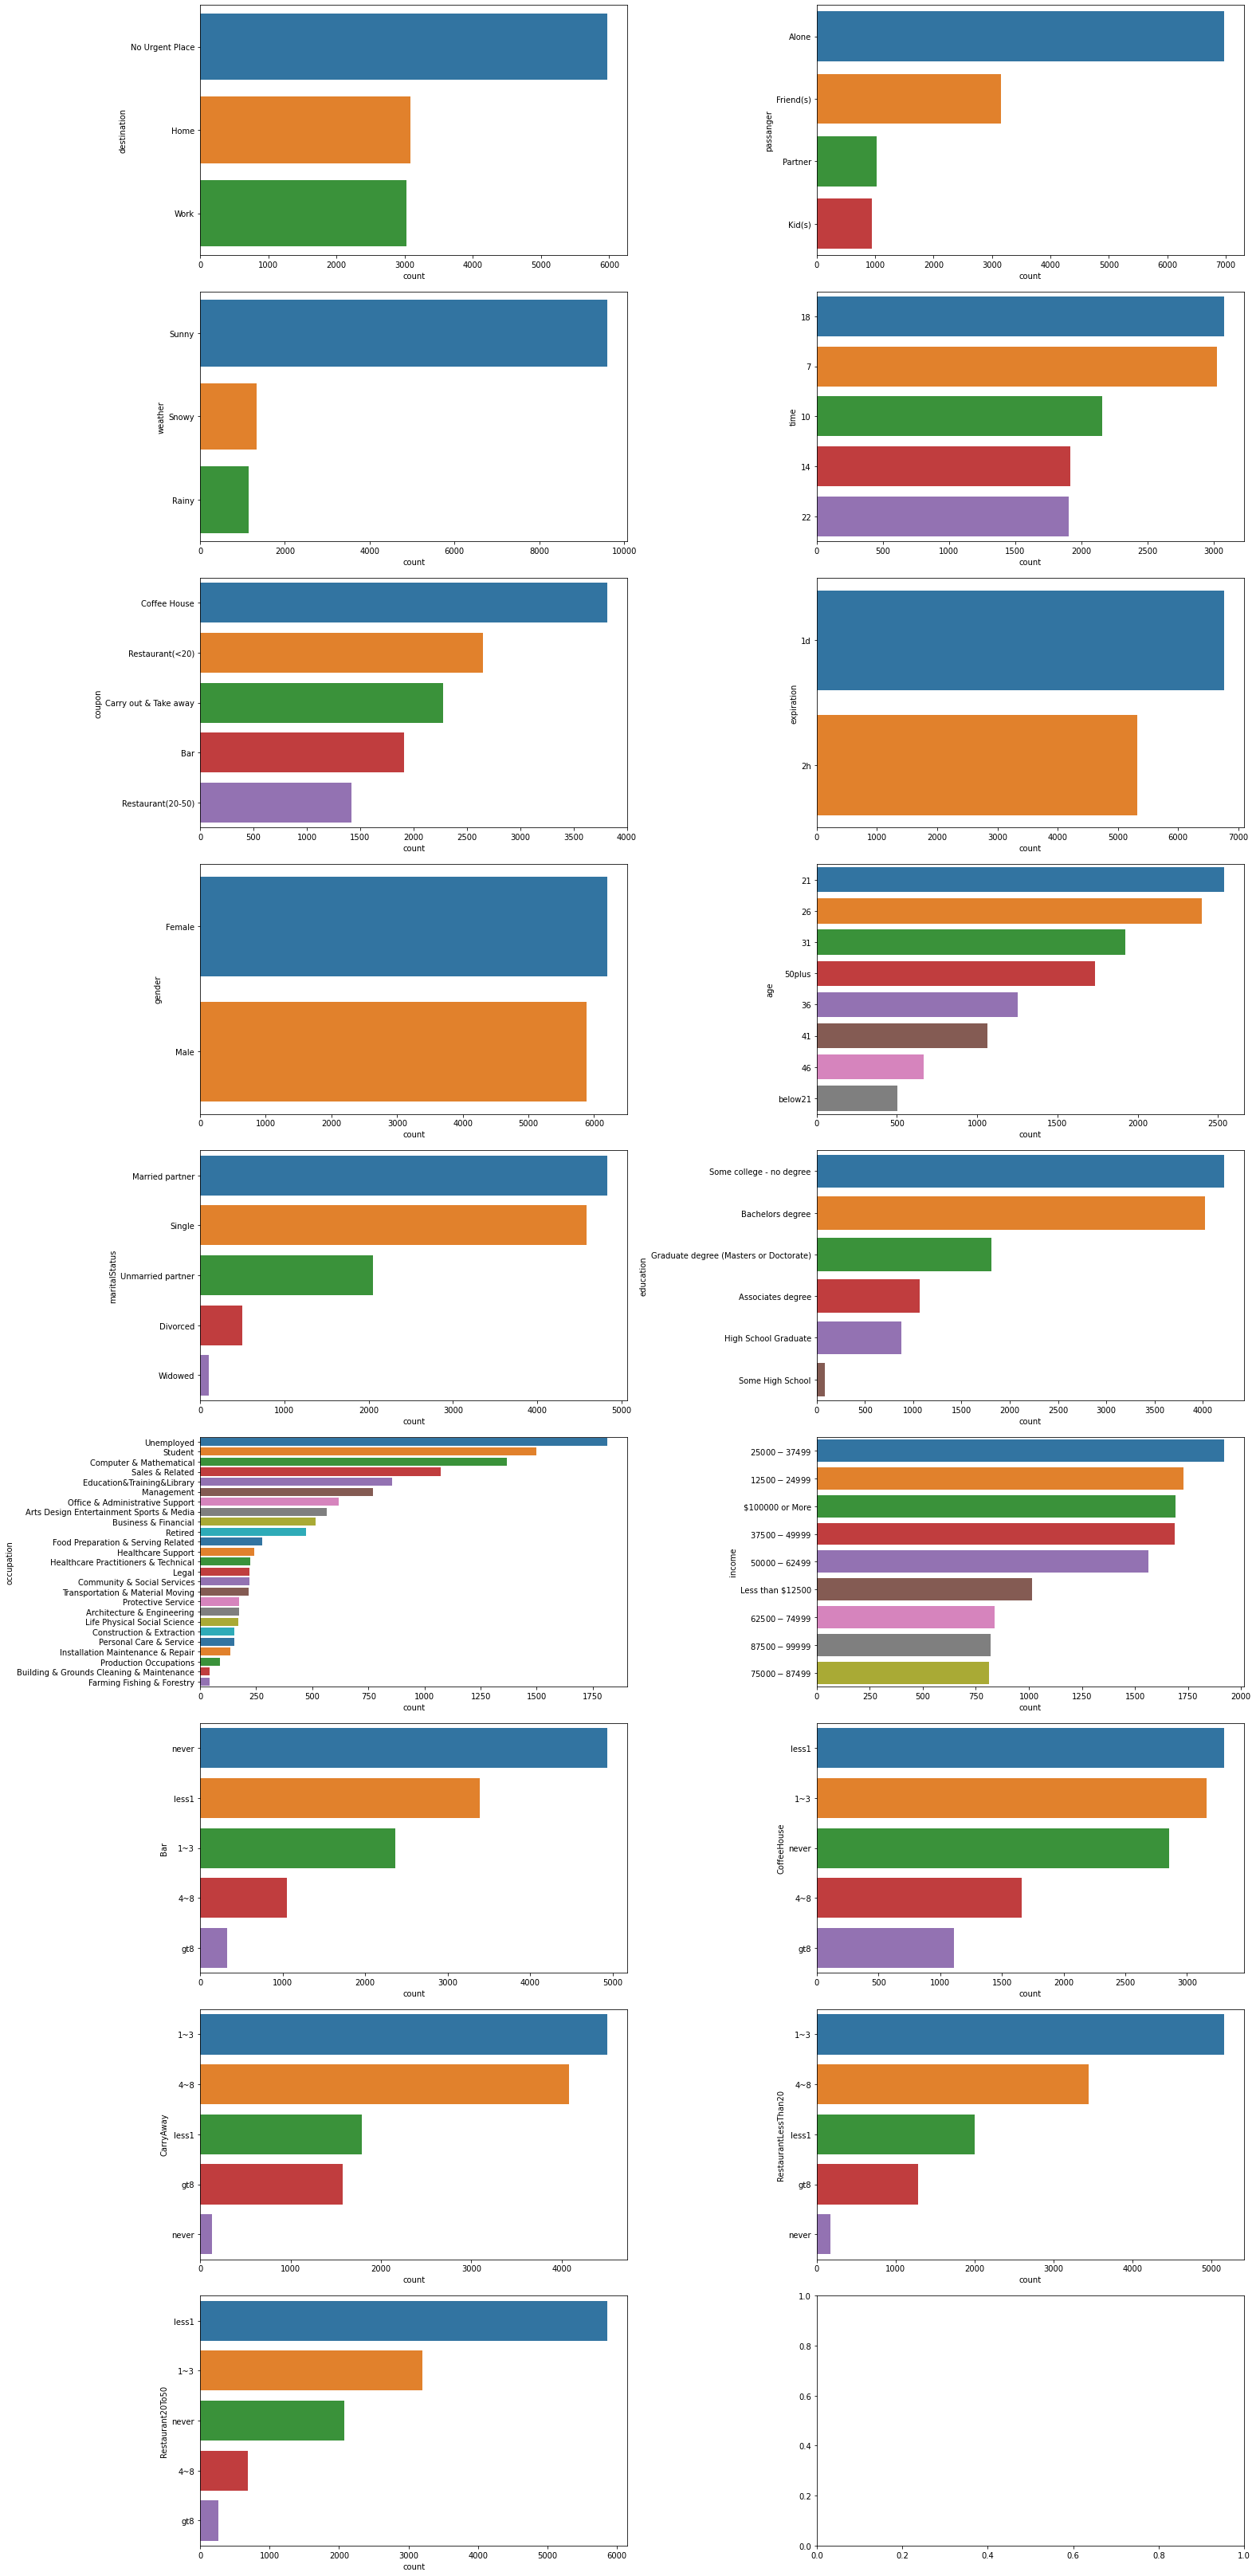

In [12]:
fig, axes = plt.subplots(9, 2, figsize=(22,45))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('object').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="tab10", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

In [13]:
frequency_label = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}
age_label = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}
income_label = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

In [14]:
frequency_columns = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

In [15]:
for col in frequency_columns:
    df[col] = df[col].map(frequency_label)
df.age = df.age.map(age_label)
df.income = df.income.map(income_label)

Bivariate Analysis:

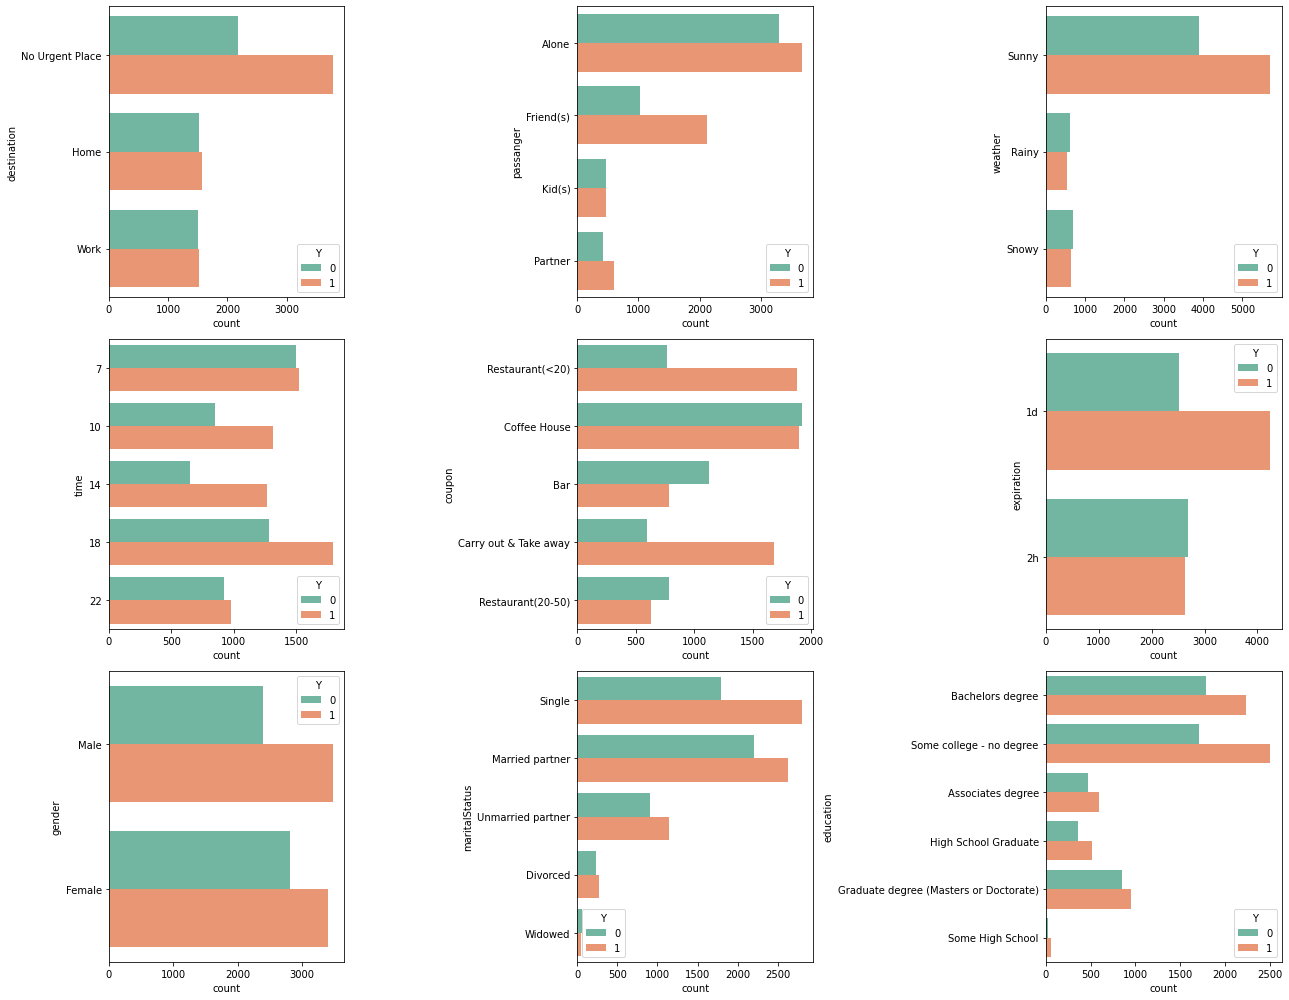

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for ax, col in zip(axes, ['destination', 'passanger', 'weather', 'time', 
                          'coupon', 'expiration', 'gender', 'maritalStatus',
                          'education']):
    sns.countplot(y=col, hue='Y', data=df, ax=ax, palette='Set2')
plt.tight_layout()
plt.show()

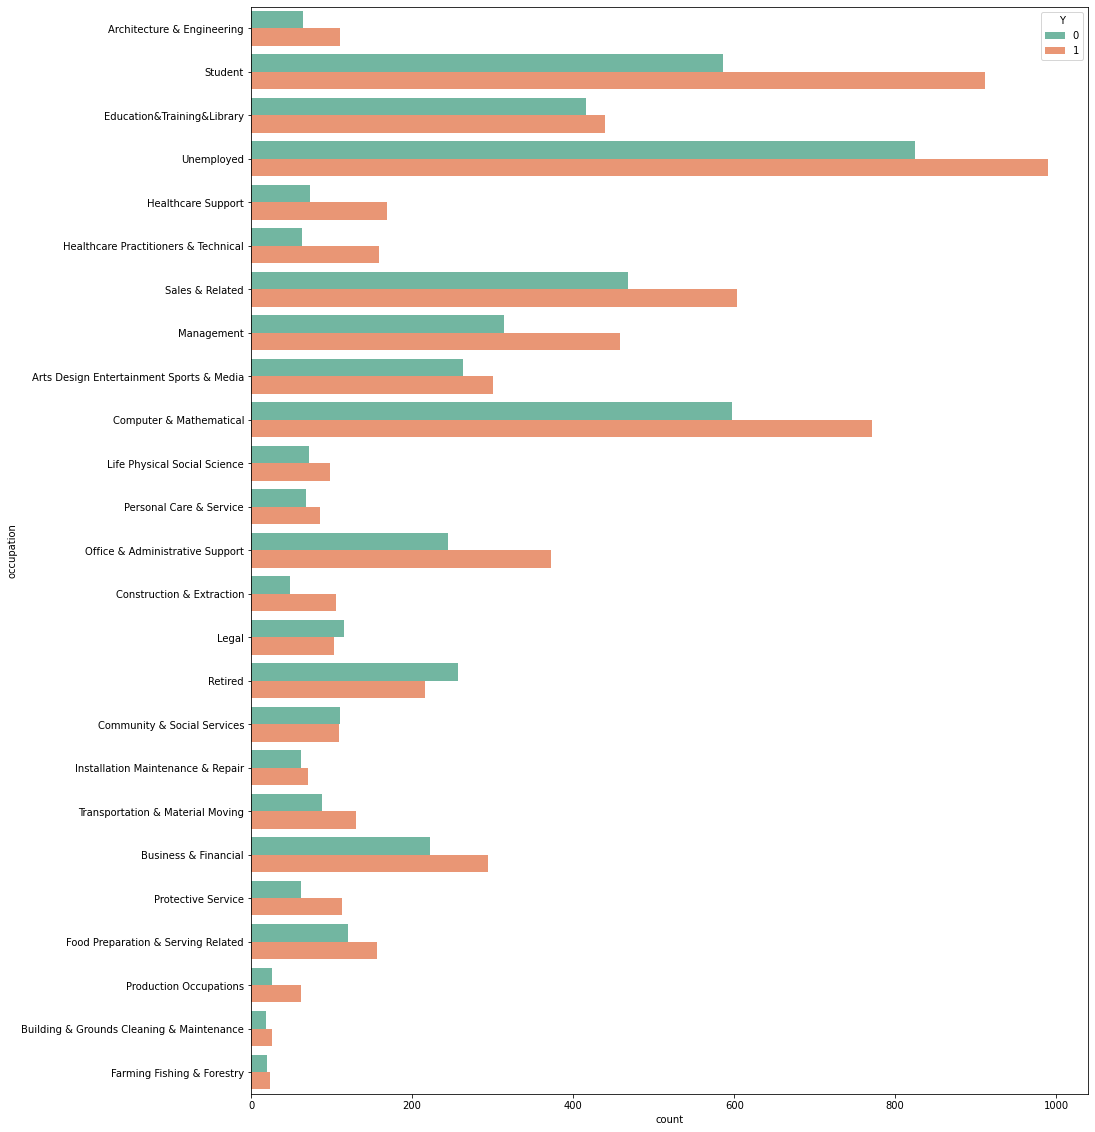

In [17]:
plt.subplots(figsize=(15, 20))
sns.countplot(y ='occupation', hue='Y', data=df, palette='Set2');
plt.show()

[Text(0.5, 1.0, 'InVehicle Coupon Recommendation Correlation Plot')]

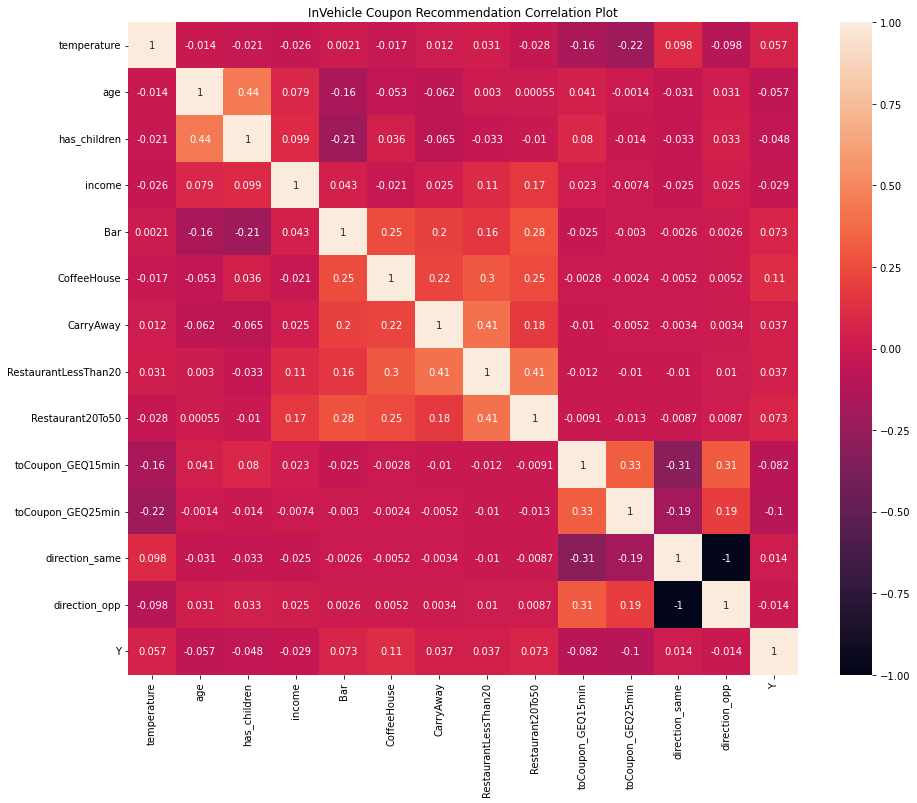

In [18]:
# Correlation plot 
fig, ax = plt.subplots(figsize=(15, 12))
dfcorr=df.corr()
sns.heatmap(dfcorr, annot=True).set(title="InVehicle Coupon Recommendation Correlation Plot")

As we can see, direction_same and direction_opp have a correlation of '-1'. This means that they are compliments of each other, hence we need to drop one of them.

In [19]:
#Dropping column 'direction_opp':
df.drop(columns=['direction_opp'], inplace=True)

To get rid of the 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min' columns, we are encoding them by assigning them values.

In [20]:
df['drive_distance'] = None
df.loc[df['toCoupon_GEQ15min'] == 0, 'drive_distance'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & \
             (df['toCoupon_GEQ25min'] == 0), 'drive_distance'] = 1
df.loc[df['toCoupon_GEQ25min'] == 1, 'drive_distance'] = 2
df.drive_distance.isna().sum()

0

After encoding the columns 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min', we can now drop those columns.

In [21]:
df.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

Scaling temperature and time:

In [22]:
scalar = StandardScaler()
col = ['temperature', 'time']
df[col] = scalar.fit_transform(df[col])
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,drive_distance
22,No Urgent Place,Alone,Sunny,-0.435632,0.034656,Restaurant(<20),1d,Male,1,Single,...,Architecture & Engineering,5,0,1,3,3,1,0,1,0
23,No Urgent Place,Friend(s),Sunny,0.871048,-0.704935,Coffee House,2h,Male,1,Single,...,Architecture & Engineering,5,0,1,3,3,1,0,0,0
24,No Urgent Place,Friend(s),Sunny,0.871048,-0.704935,Bar,1d,Male,1,Single,...,Architecture & Engineering,5,0,1,3,3,1,0,1,0
25,No Urgent Place,Friend(s),Sunny,0.871048,-0.704935,Carry out & Take away,2h,Male,1,Single,...,Architecture & Engineering,5,0,1,3,3,1,0,0,1
26,No Urgent Place,Friend(s),Sunny,0.871048,0.034656,Coffee House,1d,Male,1,Single,...,Architecture & Engineering,5,0,1,3,3,1,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12079 non-null  object 
 1   passanger             12079 non-null  object 
 2   weather               12079 non-null  object 
 3   temperature           12079 non-null  float64
 4   time                  12079 non-null  float64
 5   coupon                12079 non-null  object 
 6   expiration            12079 non-null  object 
 7   gender                12079 non-null  object 
 8   age                   12079 non-null  int64  
 9   maritalStatus         12079 non-null  object 
 10  has_children          12079 non-null  int64  
 11  education             12079 non-null  object 
 12  occupation            12079 non-null  object 
 13  income                12079 non-null  int64  
 14  Bar                   12079 non-null  int64  
 15  CoffeeHouse       

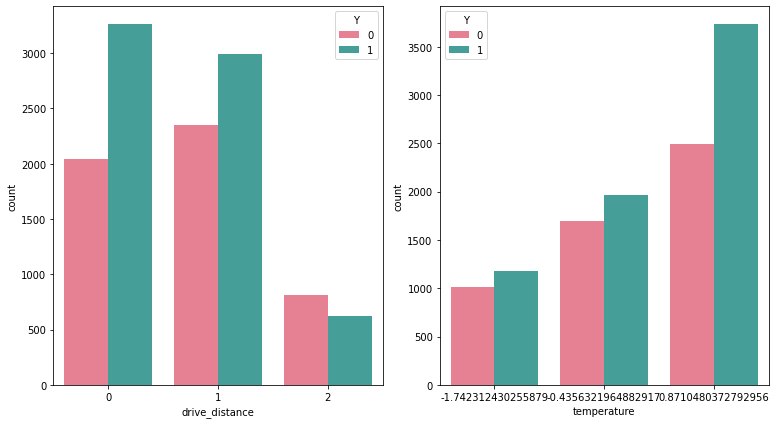

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(11, 6))
axes = axes.flatten()

for ax, col in zip(axes, ['drive_distance', 'temperature']):
    sns.countplot(x=col, hue='Y', data=df, 
                  ax=ax, palette="husl");

plt.tight_layout()
plt.show()

To convert categorical variables to numerical variables, we are label encoding them.

In [25]:
df_rf=df
label_encoder_le = LabelEncoder()
df_e_l=pd.DataFrame()
test=pd.DataFrame()
for i in df_rf.columns:
    if df_rf[i].dtypes=="object": #exclude numerical features 
        df_e_l[i]= label_encoder_le.fit_transform(df_rf[i])
    else:
        test[i]=df_rf[i]

In [26]:
df_e_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   destination     12079 non-null  int64
 1   passanger       12079 non-null  int64
 2   weather         12079 non-null  int64
 3   coupon          12079 non-null  int64
 4   expiration      12079 non-null  int64
 5   gender          12079 non-null  int64
 6   maritalStatus   12079 non-null  int64
 7   education       12079 non-null  int64
 8   occupation      12079 non-null  int64
 9   drive_distance  12079 non-null  int64
dtypes: int64(10)
memory usage: 943.8 KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           12079 non-null  float64
 1   time                  12079 non-null  float64
 2   age                   12079 non-null  int64  
 3   has_children          12079 non-null  int64  
 4   income                12079 non-null  int64  
 5   Bar                   12079 non-null  int64  
 6   CoffeeHouse           12079 non-null  int64  
 7   CarryAway             12079 non-null  int64  
 8   RestaurantLessThan20  12079 non-null  int64  
 9   Restaurant20To50      12079 non-null  int64  
 10  direction_same        12079 non-null  int64  
 11  Y                     12079 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.5 MB


In [28]:
test_id=test
test_id.insert(0, 'id', range(1, 1 + len(test_id)))

df_e_l_id=df_e_l
df_e_l_id.insert(0, 'id', range(1, 1 + len(df_e_l)))

In [29]:
test_id

,id,temperature,time,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y
22,1,-0.435632,0.034656,1,0,5,0,1,3,3,1,0,1
23,2,0.871048,-0.704935,1,0,5,0,1,3,3,1,0,0
24,3,0.871048,-0.704935,1,0,5,0,1,3,3,1,0,1
25,4,0.871048,-0.704935,1,0,5,0,1,3,3,1,0,0
26,5,0.871048,0.034656,1,0,5,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,12075,-0.435632,0.774247,2,0,6,0,0,2,3,2,1,1
12680,12076,-0.435632,-1.259628,2,0,6,0,0,2,3,2,0,1
12681,12077,-1.742312,-1.259628,2,0,6,0,0,2,3,2,1,0
12682,12078,-1.742312,-1.259628,2,0,6,0,0,2,3,2,0,0


In [30]:
df_n = df_e_l_id.merge(test_id, how='left',on='id')
df_n.head()

,id,destination,passanger,weather,coupon,expiration,gender,maritalStatus,education,occupation,...,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y
0,1,1,0,2,4,0,1,2,1,0,...,1,0,5,0,1,3,3,1,0,1
1,2,1,1,2,2,1,1,2,1,0,...,1,0,5,0,1,3,3,1,0,0
2,3,1,1,2,0,0,1,2,1,0,...,1,0,5,0,1,3,3,1,0,1
3,4,1,1,2,1,1,1,2,1,0,...,1,0,5,0,1,3,3,1,0,0
4,5,1,1,2,2,0,1,2,1,0,...,1,0,5,0,1,3,3,1,0,0


In [31]:
df_n.drop(columns=['id','occupation'], inplace=True)

In [32]:
df=df_n

In [33]:
#Split for models 
X = df.drop(columns = ['Y'])
Y= df['Y']
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)# Splitting into test, validation and test sets.


In [34]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(9663, 20)
(9663,)
(1208, 20)
(1208,)
(1208, 20)
(1208,)


(None, None)

In [35]:
X_train

,destination,passanger,weather,coupon,expiration,gender,maritalStatus,education,drive_distance,temperature,time,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same
10568,1,1,1,4,0,0,1,5,0,-1.742312,0.034656,4,1,0,0,0,3,1,1,0
5601,1,2,2,2,0,1,1,2,1,-0.435632,0.774247,3,1,7,0,0,3,4,3,0
9475,0,0,2,1,0,0,2,1,0,0.871048,0.774247,1,0,4,1,4,4,4,3,0
3359,2,0,2,3,0,0,0,5,1,0.871048,-1.259628,5,1,2,1,1,3,2,1,0
4448,0,0,2,4,1,0,0,2,0,0.871048,0.774247,7,1,3,1,2,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,1,1,2,2,0,0,1,1,0,0.871048,0.774247,7,1,1,1,3,3,4,1,0
229,0,0,2,3,0,0,2,3,1,-0.435632,0.774247,1,0,0,2,0,3,2,1,0
11116,2,0,2,3,1,0,2,1,0,0.871048,-1.259628,1,0,2,0,0,1,0,0,1
4842,2,0,2,1,0,1,1,5,2,0.871048,-1.259628,4,0,2,0,4,3,1,1,0


Evaluate Function:

In [36]:
def evaluate(y, y_hat):

      y = (y == 1)
      y_hat = (y_hat == 1)
      accuracy = (y == y_hat).sum() / y.size
      recall = (y & y_hat).sum()/ y.sum()
      precision = (y & y_hat).sum()/ y_hat.sum()

      f_score = 2*(precision * recall)/(precision+recall)  
      print(confusion_matrix(y, y_hat))     
      return accuracy, recall, precision, f_score 

Logistic Regression:

In [37]:
class LogisticRegression:
    def __init__(self, X_train, X_test, y_train, y_test, learningRate, tolerance, maxIteration) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
      
    
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def costFunction(self, X, y, i):
        sig = self.sigmoid(X.dot(self.w))

        if i == 1:
            cost = (y * np.log(sig) + (1-y)*np.log(1-sig)).sum()
            cost = -cost/X.shape[0]
        else:

            cost = np.log(np.ones(X.shape[0]) + 
                          np.exp(X.dot(self.w))) - X.dot(self.w)*y
            cost = cost.sum()
        return cost


    def gradient(self, X,y):
        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig - y).dot(X)
        return gradient

    def gradientDescent(self, X, y):
        errors_list = []
        last_error = float('inf')

        for i in tqdm(range(self.maxIteration)):
            #learning rate decay function
            learningRate = self.learningRate/(1+i*2)
            
            self.w = self.w - self.learningRate* self.gradient(X,y)

            current_error = self.costFunction(X,y, 2)
            diff = last_error - current_error
            last_error = current_error
            errors_list.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('Model has stopped learning')
                break
        
        self.error_plot(errors_list)

        
        return

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def fit(self):
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64)*0

        self.gradientDescent(self.X_train, self.y_train)
        print(self.w)

        y_train_hat = self.predict(self.X_train)
        
        f_score, recall, precision, accuracy = evaluate(self.y_train, y_train_hat)
        print('F score of training data {} '.format(f_score))
        print('Recall of training data {}'.format(recall))
        print('Precision of training data {}'.format(precision))
        print('Accuracy of training data {}'.format(accuracy))
        
        self.y_test_hat = self.predict(self.X_test)

        f_score, recall, precision, accuracy = evaluate(self.y_test, self.y_test_hat)
        print('F1 score of test data {} '.format(f_score))
        print('Recall of test data {}'.format(recall))
        print('Precision of test data {}'.format(precision))
        print('Accuracy of test data {}'.format(accuracy))

     

    def error_plot(self, errors_list):


      y_axis = errors_list
      x_axis = list(range(0,len(errors_list)))

            
      fig, ax = plt.subplots()
      ax.plot(x_axis,y_axis)
            
      ax.set (xlabel = 'Iterations', ylabel = 'Error')
      plt.show()

    
    

In [45]:
reg = LogisticRegression(X_train, X_test, y_train, y_test, learningRate = 0.000001, tolerance = 0.00001, maxIteration = 25000)

 42%|████▏     | 10469/25000 [02:00<02:46, 87.06it/s]


Model has stopped learning


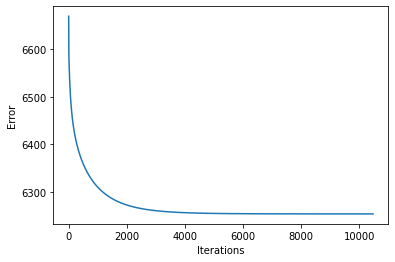

destination             0.040624
passanger               0.132120
weather                 0.138822
coupon                  0.146672
expiration             -0.699084
gender                  0.178217
maritalStatus          -0.074457
education               0.034848
drive_distance         -0.207272
temperature             0.062735
time                    0.017948
age                    -0.042811
has_children           -0.130820
income                 -0.034395
Bar                     0.043548
CoffeeHouse             0.169247
CarryAway              -0.005913
RestaurantLessThan20   -0.057067
Restaurant20To50        0.144338
direction_same          0.051001
dtype: float64
[[1773 2399]
 [1190 4301]]
F score of training data 0.628583255717686 
Recall of training data 0.7832817337461301
Precision of training data 0.6419402985074627
Accuracy of training data 0.7056024936428512
[[238 281]
 [145 544]]
F1 score of test data 0.6473509933774835 
Recall of test data 0.7895500725689405
Precision of tes

In [46]:
startlr = time.perf_counter()
reg.fit()
endlr = time.perf_counter()
print('Execution Completed in:', endlr - startlr)
lr_timer = endlr - startlr

In [141]:
y_validation_predictions = reg.predict(X_valid)

In [142]:
f_score, recall, precision, accuracy = evaluate(y_valid, y_validation_predictions)
print('F1 score of validation data {} '.format(f_score))
print('Recall of validation data {}'.format(recall))
print('Precision of validation data {}'.format(precision))
print('Accuracy of validation data {}'.format(accuracy))

[[198 313]
 [165 532]]
F1 score of validation data 0.6043046357615894 
Recall of validation data 0.763271162123386
Precision of validation data 0.6295857988165681
Accuracy of validation data 0.6900129701686123


ROC Curve and AUC:

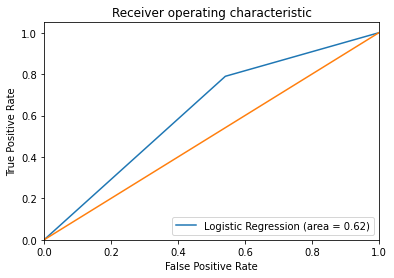

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict(X_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KNN:

In [117]:
y_train_n=np.array(y_train)
y_test_n=np.array(y_test)

In [55]:
import numpy as np
from scipy.stats import mode
 
def eucledian(d1,d2):
    dis = np.sqrt(np.sum((d1-d2)**2))
    return dis
 

def predictKNN(X_train, y , X_input, k):
    op_labels = []
     

    for item in X_input: 
         
        p_dist = []
         
        for j in range(len(X_train)): 
            distances = eucledian(np.array(X_train[j,:]) , item) 
            p_dist.append(distances) 
        p_dist = np.array(p_dist) 
         
        dist = np.argsort(p_dist)[:k] 
         
        labels = y[dist]
         
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [140]:
startknn = time.perf_counter()

y_pred = predictKNN(np.array(X_train),np.array(y_train),np.array(X_test), 19)

y_pred_train = predictKNN(np.array(X_train),np.array(y_train),np.array(X_train), 19)


f_score, recall, precision, accuracy = evaluate(y_train, np.array(y_pred_train).astype('int64'))
print('F1 score of train data {}'.format(f_score))
print('Recall of train data {}'.format(recall))
print('Precision of train data {}'.format(precision))
print('Accuracy of train data {}'.format(accuracy))


f_score, recall, precision, accuracy = evaluate(y_test, np.array(y_pred).astype('int64'))
print('F1 score of test data {}'.format(f_score))
print('Recall of test data {}'.format(recall))
print('Precision of test data {}'.format(precision))
print('Accuracy of test data {}'.format(accuracy))


endknn = time.perf_counter()

print('Completed in', endknn - startknn)

knn_timer = endknn - startknn

[[2346 1826]
 [ 963 4528]]
F1 score of train data 0.7113732795198179
Recall of train data 0.8246221089054817
Precision of train data 0.7126219704123387
Accuracy of train data 0.764542000844238
[[270 249]
 [139 550]]
F1 score of test data 0.6788079470198676
Recall of test data 0.7982583454281568
Precision of test data 0.688360450563204
Accuracy of test data 0.7392473118279571
Completed in 1196.218782480999


In [180]:
startknn = time.perf_counter()

y_pred = predictKNN(np.array(X_train),np.array(y_train),np.array(X_test), 19)

f_score, recall, precision, accuracy = evaluate(y_test, np.array(y_pred).astype('int64'))
print('F1 score of test data {}'.format(f_score))
print('Recall of test data {}'.format(recall))
print('Precision of test data {}'.format(precision))
print('Accuracy of test data {}'.format(accuracy))


endknn = time.perf_counter()

print('Completed in', endknn - startknn)

knn_timer = endknn - startknn

[[242 252]
 [170 544]]
F1 score of test data 0.6506622516556292
Recall of test data 0.7619047619047619
Precision of test data 0.6834170854271356
Accuracy of test data 0.7205298013245033
Completed in 139.238050441003


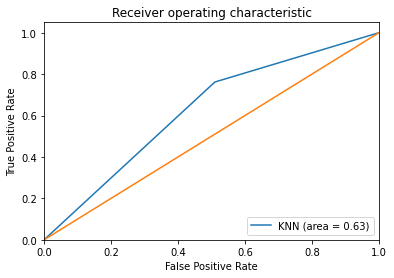

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [182]:
startknn = time.perf_counter()

y_pred_valid = predictKNN(np.array(X_train),np.array(y_train),np.array(X_valid), 19)

f_score, recall, precision, accuracy = evaluate(y_valid, np.array(y_pred_valid).astype('int64'))
print('F1 score of test data {}'.format(f_score))
print('Recall of test data {}'.format(recall))
print('Precision of test data {}'.format(precision))
print('Accuracy of test data {}'.format(accuracy))


endknn = time.perf_counter()

print('Completed in', endknn - startknn)

knn_timer = endknn - startknn

[[251 274]
 [147 536]]
F1 score of test data 0.6514900662251656
Recall of test data 0.7847730600292826
Precision of test data 0.6617283950617284
Accuracy of test data 0.7180174146014735
Completed in 125.87590597500093


Neural Networks:

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [148]:
#Defining our sequential model
nn = Sequential()
nn.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='sigmoid'))
nn.add(Dense(1))

nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1344      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [149]:
nn.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [153]:
startnn = time.perf_counter()

EPOCHS = 19
BATCH_SIZE = 10
history = nn.fit(X_train, y_train_n, validation_data=(X_test, y_test_n), epochs=EPOCHS, batch_size=BATCH_SIZE)



endnn = time.perf_counter()

print('Execution Completed in:', endnn - startnn)

nn_timer = endnn - startnn

Epoch 1/19
967/967 [==============================] - 2s 2ms/step - loss: 0.5938 - accuracy: 0.6847 - val_loss: 0.5864 - val_accuracy: 0.7152
Epoch 2/19
967/967 [==============================] - 2s 2ms/step - loss: 0.5947 - accuracy: 0.6861 - val_loss: 0.5685 - val_accuracy: 0.7053
Epoch 3/19
967/967 [==============================] - 2s 2ms/step - loss: 0.5950 - accuracy: 0.6864 - val_loss: 0.5758 - val_accuracy: 0.6714
Epoch 4/19
967/967 [==============================] - 2s 2ms/step - loss: 0.5927 - accuracy: 0.6822 - val_loss: 0.5753 - val_accuracy: 0.7053
Epoch 5/19
967/967 [==============================] - 3s 3ms/step - loss: 0.5915 - accuracy: 0.6892 - val_loss: 0.5775 - val_accuracy: 0.7020
Epoch 6/19
967/967 [==============================] - 2s 2ms/step - loss: 0.5908 - accuracy: 0.6878 - val_loss: 0.5654 - val_accuracy: 0.7020
Epoch 7/19
967/967 [==============================] - 3s 3ms/step - loss: 0.5864 - accuracy: 0.6919 - val_loss: 0.5767 - val_accuracy: 0.7003
Epoch 

In [157]:
score = nn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5815175771713257
Test accuracy: 0.6572847962379456


In [156]:
score = nn.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.611655592918396
Test accuracy: 0.6382450461387634


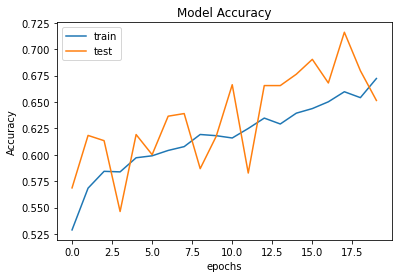

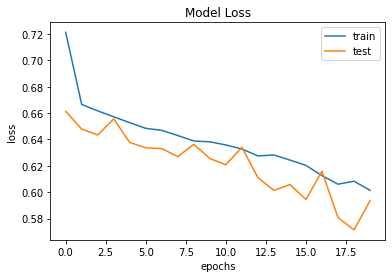

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [155]:
nn_accuracy_test = max(history.history['val_accuracy'])
nn_accuracy_test

0.7226821184158325

38/38 [==============================] - 0s 2ms/step


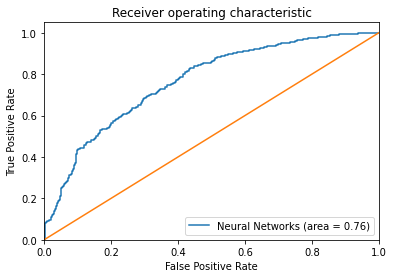

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nn.predict(X_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Neural Networks (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine:

In [159]:
class SVM():
    def __init__(self, max_iter=100, kernel_type='linear', C=1.0, e_p=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gauss
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.e_p = e_p
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alp = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alp_prev = np.copy(alp)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alp_pr_j, alp_pr_i = alp[j], alp[i]
                (L, H) = self.compute_L_H(self.C, alp_pr_j, alp_pr_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alp, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alp values
                alp[j] = alp_pr_j + float(y_j * (E_i - E_j))/k_ij
                alp[j] = max(alp[j], L)
                alp[j] = min(alp[j], H)

                alp[i] = alp_pr_i + y_i*y_j * (alp_pr_j - alp[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
            diff = np.linalg.norm(alp - alp_prev)
            if diff < self.e_p:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alp, y, X)
        # Get support vectors
        alp_idx = np.where(alp > 0)[0]
        support_vectors = X[alp_idx, :]
        return support_vectors, count
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alp, y, X):
        return np.dot(X.T, np.multiply(alp,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alp_pr_j, alp_pr_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alp_pr_j - alp_pr_i), min(C, C - alp_pr_i + alp_pr_j))
        else:
            return (max(0, alp_pr_i + alp_pr_j - C), min(C, alp_pr_i + alp_pr_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)
    def kernel_gauss(self,x1, x2, sigma=1):
        return np.exp(- (np.linalg.norm(x1 - x2, 2)) * 2 / (2 * sigma * 2))
    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b


In [160]:
#SVM
X = df.drop(columns = ['Y'])
Y= df['Y']
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [161]:
y_train_s=pd.DataFrame()
y_train_s=y_train.copy()
y_test_s=pd.DataFrame()
y_test_s=y_test.copy()
y_train_s.replace(0, -1, inplace=True) 
y_test_s.replace(0, -1, inplace=True) 

In [162]:
model = SVM(max_iter=1000, kernel_type='linear', C=0.55, e_p=0.0001)
start_time = time.time()
model.fit(X_train.astype(float).to_numpy(),y_train_s.astype(float).to_numpy())
print("--- %s mins ---" % ((time.time() - start_time)/60.0))


--- 3.9446378628412884 mins ---


Y Test:

In [164]:
Y_predicted = [model.predict(x) for x in X_test.to_numpy()]

print(classification_report(y_test_s, Y_predicted))


              precision    recall  f1-score   support

          -1       0.53      0.61      0.57       494
           1       0.70      0.62      0.66       714

    accuracy                           0.62      1208
   macro avg       0.61      0.62      0.61      1208
weighted avg       0.63      0.62      0.62      1208



In [165]:
confusion_matrix(y_test_s, Y_predicted)

array([[303, 191],
       [273, 441]])

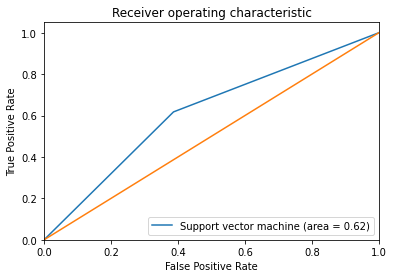

In [167]:
svm_roc_auc = roc_auc_score(y_test_s, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_s, model.predict(X_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Support vector machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Y Validation:

In [168]:
y_valid_s=pd.DataFrame()
y_valid_s=y_valid.copy()

In [176]:
Y_predicted_v = [model.predict(x) for x in X_valid.to_numpy()]
for i in range(len(Y_predicted_v)):
    if Y_predicted_v[i] == -1:
        Y_predicted_v[i] = 0
print(classification_report(y_valid_s, Y_predicted_v))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       525
           1       0.65      0.61      0.63       683

    accuracy                           0.60      1208
   macro avg       0.59      0.59      0.59      1208
weighted avg       0.60      0.60      0.60      1208



In [177]:
confusion_matrix(y_valid_s, Y_predicted_v)

array([[301, 224],
       [264, 419]])

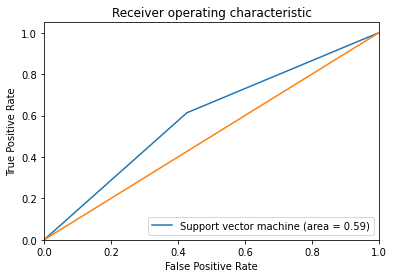

In [178]:
svm_roc_auc = roc_auc_score(y_valid_s, model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(y_valid_s, model.predict(X_valid)[:])
plt.figure()
plt.plot(fpr, tpr, label='Support vector machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Performance Evaluation:

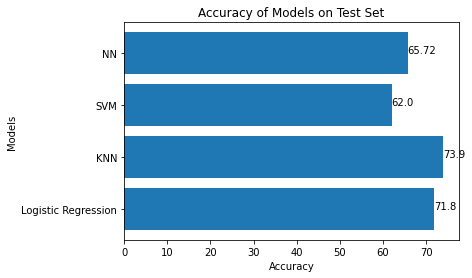

<Figure size 72000x14400 with 0 Axes>

In [191]:
x = ['Logistic Regression','KNN','SVM','NN']
y = [71.8, 73.9, 62.0, 65.72]
plt.barh(x, y)

for index, value in enumerate(y):
	plt.text(value, index,
			str(value))
plt.title("Accuracy of Models on Test Set")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.figure(figsize = (1000, 200))
plt.show()